In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sns
%matplotlib inline
sns.set_context("notebook")

# 2014 expenditure the US spent on foreign aid. 
# Found here: https://explorer.usaid.gov/query
aid = pd.read_csv("data/us_aid.csv")
for attribute in aid:
    print attribute

id
country_id
country_code
country_name
region_id
region_name
income_group_id
income_group_name
income_group_acronym
implementing_agency_id
implementing_agency_acronym
implementing_agency_name
implementing_subagency_id
subagency_acronym
subagency_name
channel_category_id
channel_category_name
channel_subcategory_name
channel_subcategory_id
channel_id
channel_name
dac_category_id
dac_category_name
dac_sector_code
dac_sector_name
dac_purpose_code
dac_purpose_name
funding_account_id
funding_account_name
assistance_category_id
assistance_category_name
activity_id
activity_name
activity_project_number
activity_start_date
activity_end_date
transaction_type_id
transaction_type_name
fiscal_year
current_amount
constant_amount
funding_agency_id
funding_agency_name
funding_agency_acronym
aid_type_group_id
aid_type_group_name


In [126]:
aid.head(20)

,id,country_id,country_code,country_name,region_id,region_name,income_group_id,income_group_name,income_group_acronym,implementing_agency_id,...,transaction_type_id,transaction_type_name,fiscal_year,current_amount,constant_amount,funding_agency_id,funding_agency_name,funding_agency_acronym,aid_type_group_id,aid_type_group_name
0,103666,1002,WLD,World,7,World,0,NaN,NaN,1,...,2,Obligations,2014,1618095498,1594231553,2,Department of State,STATE,2,Core contributions
1,103679,1002,WLD,World,7,World,0,NaN,NaN,4,...,2,Obligations,2014,1355000000,1335016232,28,Executive Office of the President,EOP,2,Core contributions
2,104093,1002,WLD,World,7,World,0,NaN,NaN,6,...,2,Obligations,2014,375830000,370287195,6,Department of Health and Human Services,HHS,3,Project-Type
3,104138,1002,WLD,World,7,World,0,NaN,NaN,1,...,2,Obligations,2014,350000000,344838141,1,U.S. Agency for International Development,USAID,3,Project-Type
4,104342,894,ZMB,Zambia,5,Sub-Saharan Africa,45,Lower Middle Income Country,LMIC,3,...,2,Obligations,2014,272879068,268854601,3,Millennium Challenge Corporation,MCC,3,Project-Type
5,104343,400,JOR,Jordan,3,Middle East and North Africa,44,Upper Middle Income Country,UMIC,1,...,2,Obligations,2014,272500000,268481124,1,U.S. Agency for International Development,USAID,3,Project-Type
6,104488,1002,WLD,World,7,World,0,NaN,NaN,4,...,2,Obligations,2014,226957000,223609800,28,Executive Office of the President,EOP,2,Core contributions
7,104570,1002,WLD,World,7,World,0,NaN,NaN,4,...,2,Obligations,2014,205546750,202515311,4,Department of the Treasury,TREAS,2,Core contributions
8,104686,566,NGA,Nigeria,5,Sub-Saharan Africa,45,Lower Middle Income Country,LMIC,6,...,2,Obligations,2014,188888230,186102474,2,Department of State,STATE,3,Project-Type
9,104755,4,AFG,Afghanistan,4,South and Central Asia,46,Low Income Country,LIC,2,...,2,Obligations,2014,180000000,177345329,2,Department of State,STATE,3,Project-Type


In [127]:
# Let's look at the development assistance committee categories
aid['dac_category_name'].unique()

array(['Health and Population', 'Other', 'Humanitarian', 'Governance',
       'Agriculture', 'Infrastructure', 'Economic Growth', 'Education',
       'Commodity Assistance'], dtype=object)

In [128]:
def total_costs(dataframe, region_label, cost_label):
    costs = {}
    for index,row in dataframe.iterrows():
        region = row[region_label]
        cost = row[cost_label]
        if region in costs:
            costs[region] += cost
        else:
            costs[region] = cost
    return costs

def costs_of(category, region_label, cost_label):
    aid_category = aid[aid.dac_category_name == category]
    return total_costs(aid_category, region_label, cost_label)

def dict_to_df(dictionary, cols):
    return pd.DataFrame(dictionary.items(), columns=cols)

education_costs = costs_of('Education', 'region_name', 'current_amount')
education_df = dict_to_df(education_costs, ['Region', 'Total Costs'])
education_df

,Region,Total Costs
0,East Asia and Oceania,168431696
1,Europe and Eurasia,60311057
2,Sub-Saharan Africa,308489688
3,Western Hemisphere,67947111
4,World,139262778
5,South and Central Asia,230967427
6,Middle East and North Africa,122100045


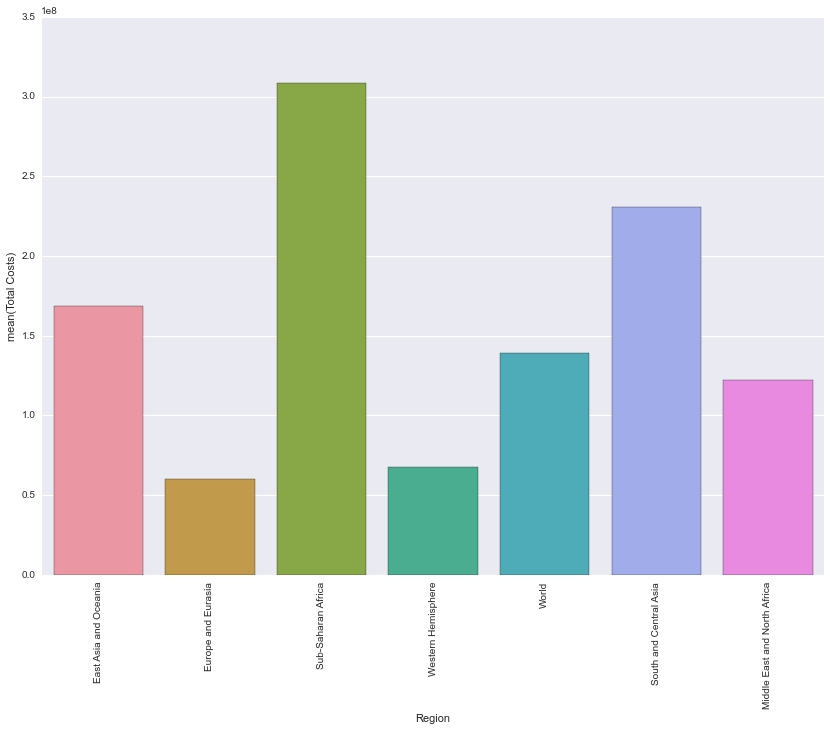

In [129]:
def plot_costs(costs, xlabel, ylabel):
    plt.figure(figsize=(14, 10))
    cost_plot = sns.barplot(data=costs, x=xlabel, y=ylabel)
    cost_plot.set_xticklabels(costs[xlabel], rotation=90)

plot_costs(education_df, 'Region', 'Total Costs')

In [130]:
country_edu_costs = costs_of('Education', 'country_name', 'current_amount')
country_edu_df = dict_to_df(country_edu_costs, ['Region', 'Total Costs'])
country_edu_df.sort('Total Costs')

,Region,Total Costs
48,"China, Republic of (Taiwan)",-642
103,Botswana,3361
85,Nepal,15356
102,Paraguay,17345
82,Cote d'Ivoire,20694
84,Southern Africa Region,24313
47,Angola,25000
50,Fiji,47016
76,Uzbekistan,50000
0,Turkmenistan,50000


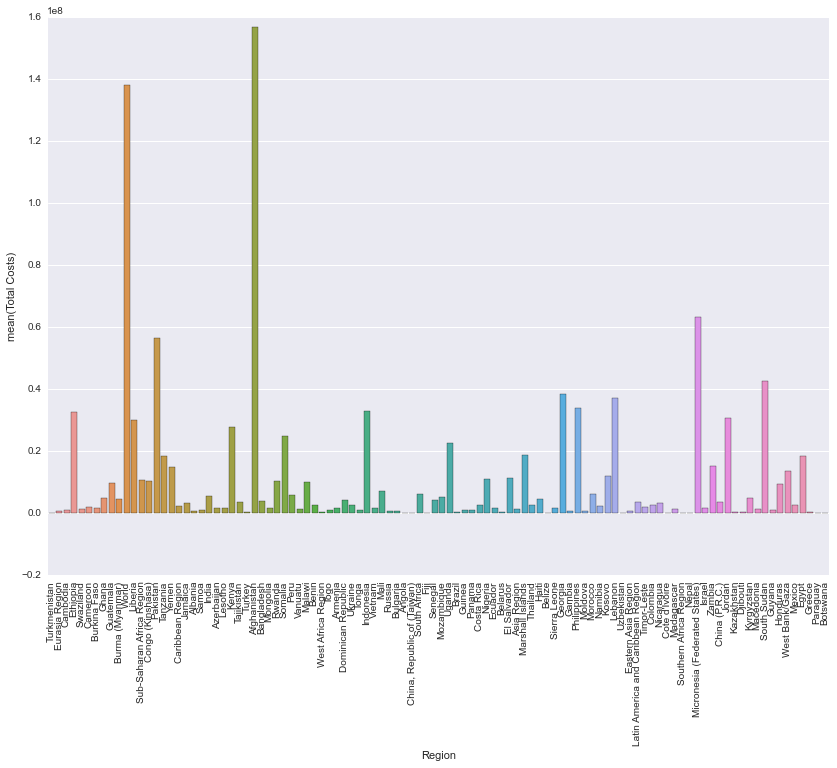

In [132]:
plot_costs(country_edu_df, 'Region', 'Total Costs')